# Phase 2 — Exploratory Data Analysis (EDA)

**Project:** Dynamic Financial Risk Modeling  
**Dataset:** S&P 500 Index  
**Period:** 2000–2025 

---

## Objective
To examine empirical properties of prices and log returns, including volatility
patterns, distributional shape, and stylized facts relevant for financial risk modeling.

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Preparation for Exploratory Analysis

This phase uses the processed log-return dataset constructed in Phase 1 to
examine the empirical properties of financial returns.

Let $r_t$ denote the daily log returns of the S&P 500 index. The objective
of this phase is to explore distributional characteristics, temporal
dependencies, and deviations from classical modeling assumptions.

Exploratory analysis focuses on:
- Distributional shape and tail behavior
- Volatility patterns over time
- Preliminary evidence of nonstationarity

The dataset contains:
- Daily timestamps
- Corresponding log returns computed from price data

These diagnostics guide the selection of appropriate statistical models
in subsequent phases.

In [ ]:
returns = pd.read_csv(
    "../data/processed/sp500_log_returns.csv",
    parse_dates=["Date"]
)

returns.head()

,Date,log_return
0,2000-01-04,-0.039099
1,2000-01-05,0.001920
2,2000-01-06,0.000955
3,2000-01-07,0.026730
4,2000-01-10,0.011128


## Price Dynamics

The S&P 500 closing price is visualized to provide context for long-term
growth, drawdowns, and crisis periods.

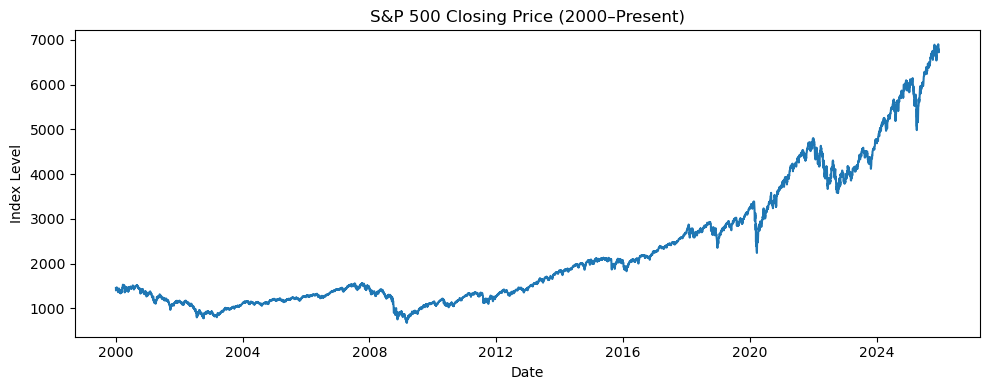

In [ ]:
price = pd.read_csv(
    "../data/raw/sp500_raw_en.csv",
    parse_dates=["Date"]
)

price = price[price["Date"] >= "2000-01-01"]

plt.figure(figsize=(10, 4))
plt.plot(price["Date"], price["Close"])
plt.title("S&P 500 Closing Price (2000–Present)")
plt.xlabel("Date")
plt.ylabel("Index Level")
plt.tight_layout()
plt.show()

## Log Returns

Log returns are examined to assess stationarity and volatility clustering,
which are central to financial risk modeling.

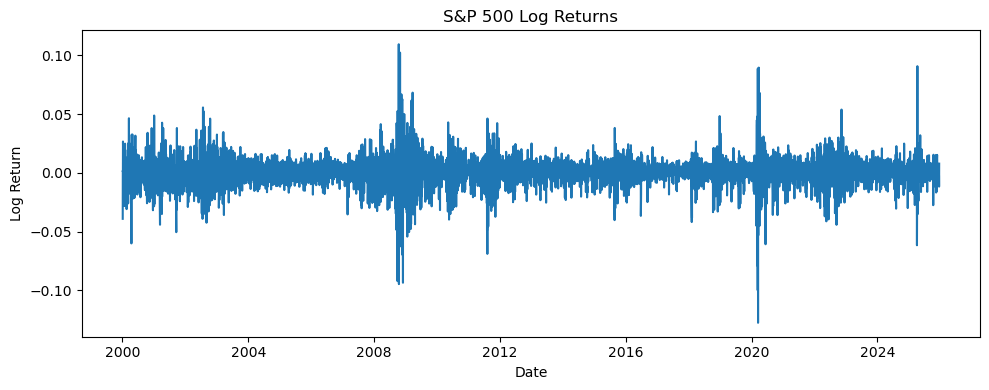

In [11]:
plt.figure(figsize=(10, 4))
plt.plot(returns["Date"], returns["log_return"])
plt.title("S&P 500 Log Returns")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.tight_layout()
plt.show()

## Rolling Volatility

Rolling standard deviation is used to visualize volatility clustering
at different time horizons.

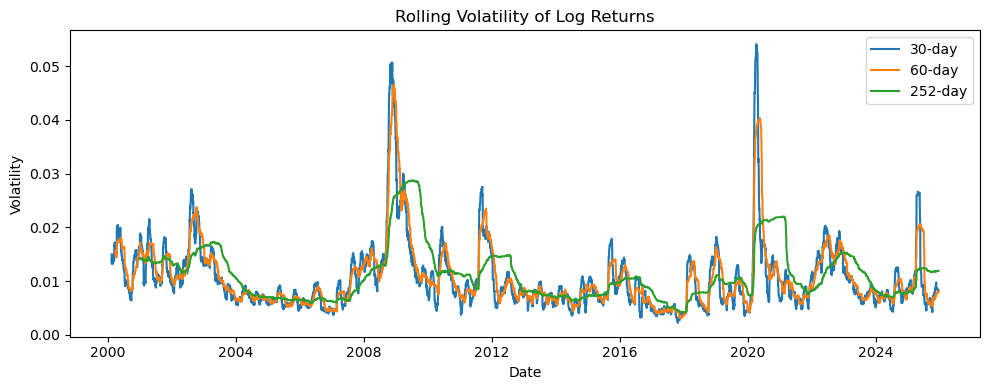

In [12]:
returns["vol_30"] = returns["log_return"].rolling(30).std()
returns["vol_60"] = returns["log_return"].rolling(60).std()
returns["vol_252"] = returns["log_return"].rolling(252).std()

plt.figure(figsize=(10, 4))
plt.plot(returns["Date"], returns["vol_30"], label="30-day")
plt.plot(returns["Date"], returns["vol_60"], label="60-day")
plt.plot(returns["Date"], returns["vol_252"], label="252-day")
plt.title("Rolling Volatility of Log Returns")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.tight_layout()
plt.show()

## Distribution of Log Returns

The empirical distribution of returns is examined to assess symmetry,
tail behavior, and deviation from normality.

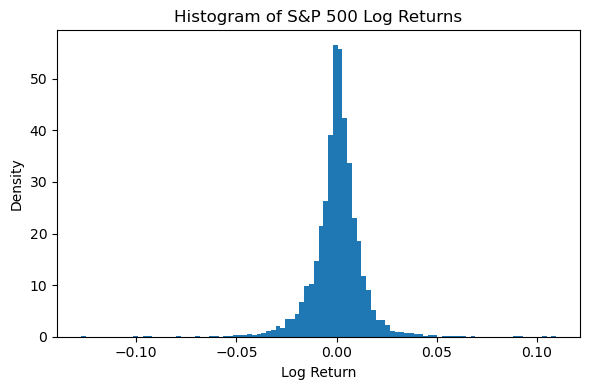

count    6530.000000
mean        0.000236
std         0.012221
min        -0.127652
25%        -0.004748
50%         0.000639
75%         0.005875
max         0.109572
Name: log_return, dtype: float64

In [13]:
plt.figure(figsize=(6, 4))
plt.hist(returns["log_return"], bins=100, density=True)
plt.title("Histogram of S&P 500 Log Returns")
plt.xlabel("Log Return")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

returns["log_return"].describe()

## Key Observations

- Log returns exhibit volatility clustering rather than constant variance.
- Periods of elevated volatility correspond to known market stress events.
- The return distribution shows heavy tails and slight asymmetry,
  indicating deviations from Gaussian assumptions.

These stylized facts motivate the use of volatility models and
tail-risk methods in subsequent phases.

---

## Phase 2 Conclusion — Exploratory Data Analysis

This phase examined the empirical properties of S&P 500 log returns through
exploratory data analysis and distributional diagnostics.

The analysis revealed several key features of the data:
- Returns exhibit **non-Gaussian behavior**, with heavy tails and excess
  kurtosis.
- Volatility displays **temporal dependence**, with periods of heightened
  variability clustering over time.
- Simple summary statistics and visual diagnostics suggest violations of
  constant-variance assumptions.

These findings indicate that classical models assuming homoskedasticity and
normality are insufficient for capturing the risk characteristics of financial
returns.

---

## Bridge to Subsequent Phases — From Exploration to Structured Modeling

The presence of volatility clustering motivates the use of **conditional
volatility models**, which explicitly allow risk to evolve over time.
Accordingly, Phase 3 introduces GARCH-family models to formally quantify
volatility persistence and asymmetry.

At the same time, the observed heavy-tailed behavior suggests that extreme
losses cannot be adequately described by variance dynamics alone. This insight
motivates the later application of **Extreme Value Theory (EVT)** in Phase 4,
where attention shifts to the statistical modeling of rare but severe market
events.

Together, these transitions move the analysis from descriptive exploration to
rigorous, model-based risk quantification.

---

**Status:** Phase 2 completed — empirical properties identified; data ready for conditional volatility modeling (Phase 3).